In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

features = pd.read_csv("../data/cache/feature_engineered/features.csv.zip", index_col=0, parse_dates=["date"])
target = pd.read_csv("../data/cache/data_engineered/target.csv.zip", index_col=0)
data = pd.concat([features, target], axis=1)
data = data.loc[data.index.str.startswith("tr")]
data = data.loc[data.store.eq(1)]

## sample: Jun 2014

In [24]:
data_wide = data.pivot("date", "item", "sales")
data_wide.head()

/tmp/ipykernel_55467/3075528200.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_wide = data.pivot("date", "item", "sales")


item,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,13.0,33.0,15.0,10.0,11.0,31.0,25.0,33.0,18.0,37.0,...,6.0,21.0,22.0,20.0,37.0,30.0,17.0,21.0,18.0,30.0
2013-01-02,11.0,43.0,30.0,11.0,6.0,36.0,23.0,37.0,23.0,34.0,...,15.0,24.0,27.0,15.0,40.0,30.0,15.0,26.0,10.0,32.0
2013-01-03,14.0,23.0,14.0,8.0,8.0,18.0,34.0,38.0,25.0,32.0,...,5.0,14.0,19.0,11.0,42.0,30.0,5.0,25.0,17.0,25.0
2013-01-04,13.0,18.0,10.0,19.0,9.0,19.0,36.0,54.0,22.0,45.0,...,9.0,22.0,29.0,22.0,49.0,37.0,13.0,26.0,22.0,32.0
2013-01-05,10.0,34.0,23.0,12.0,8.0,31.0,38.0,51.0,29.0,35.0,...,13.0,18.0,34.0,19.0,52.0,28.0,12.0,28.0,15.0,35.0


<AxesSubplot: xlabel='date'>

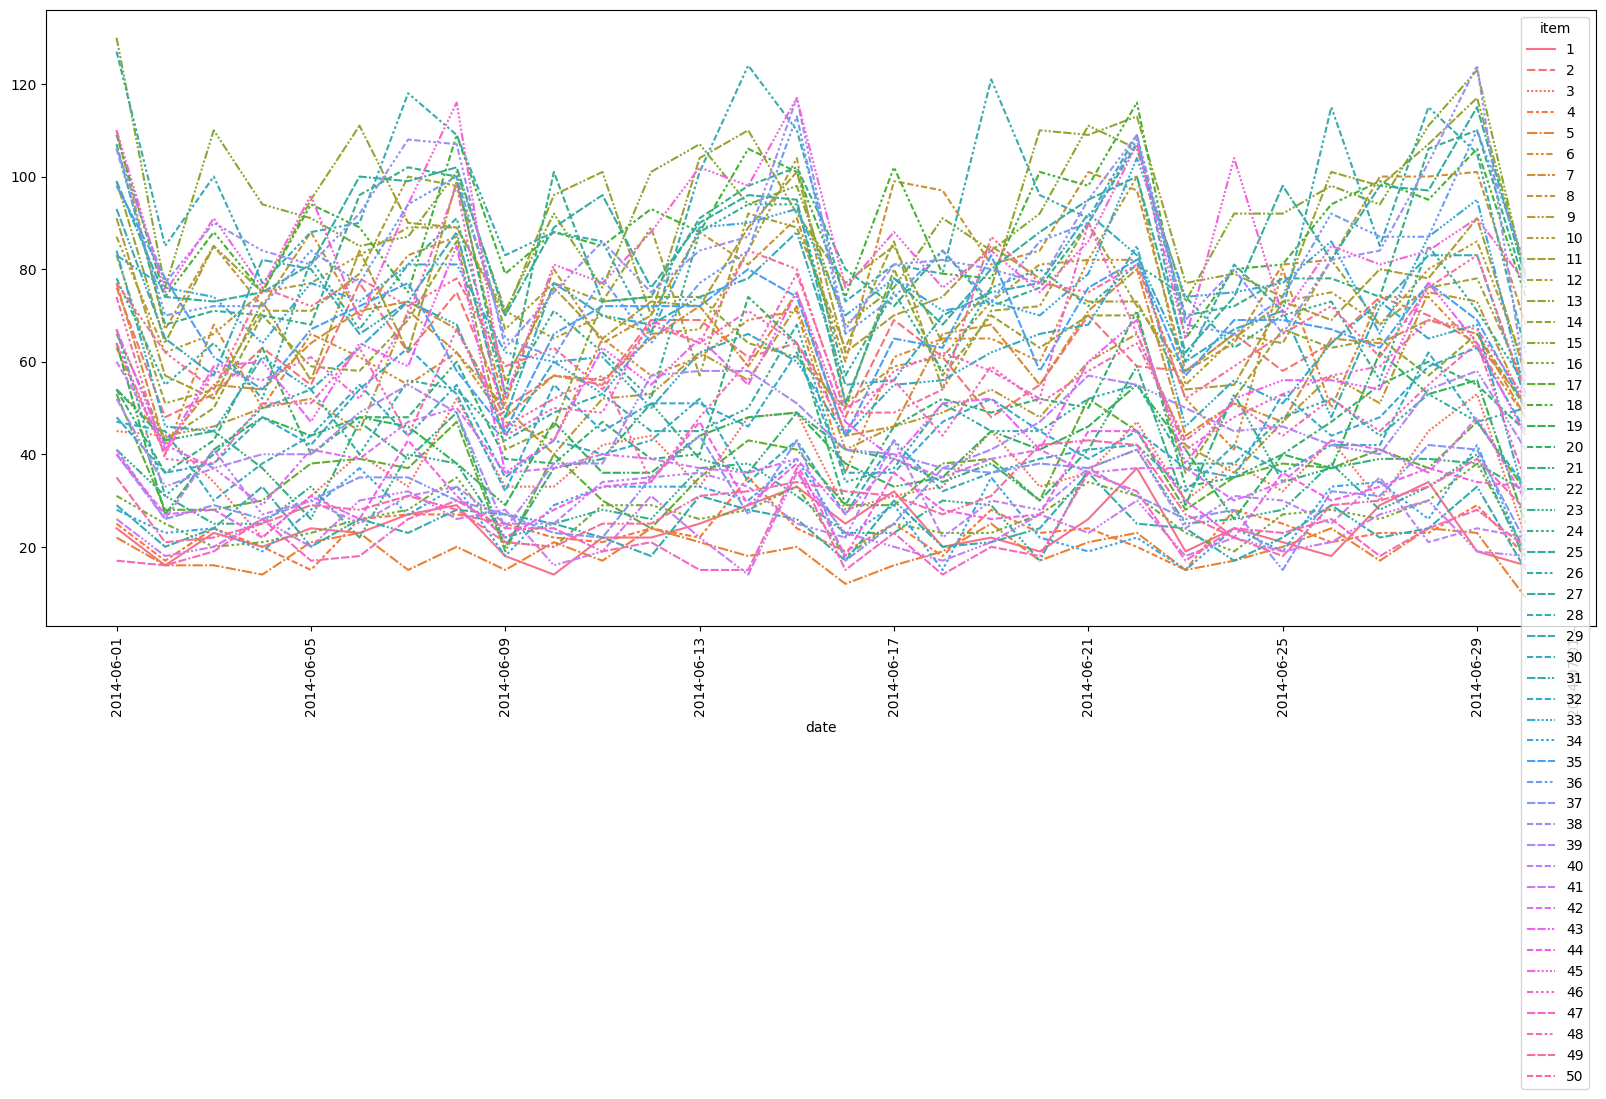

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.tick_params(axis="x", labelrotation=90)
sns.lineplot(data=data_wide.loc[(data_wide.index >= "2014-06") & (data_wide.index < "2014-07")])

## stat: groupby(["year-month", "item"])

In [26]:
data_wide = data.groupby(["year-month", "item"], as_index=False).mean().pivot("year-month", "item", "sales")
data_wide.head()

/tmp/ipykernel_55467/2932813921.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_wide = data.groupby(["year-month", "item"], as_index=False).mean().pivot("year-month", "item", "sales")
/tmp/ipykernel_55467/2932813921.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_wide = data.groupby(["year-month", "item"], as_index=False).mean().pivot("year-month", "item", "sales")


item,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
year-month,,,,,,,,,,,,,,,,,,,,,
2013-01,10.580645,29.387097,17.645161,11.161290,8.903226,29.354839,30.032258,39.774194,25.387097,36.161290,...,10.580645,18.451613,26.129032,14.806452,41.161290,30.032258,11.838710,24.612903,14.193548,33.612903
2013-02,11.500000,31.178571,21.321429,12.142857,9.857143,31.964286,33.607143,43.964286,28.857143,40.428571,...,12.214286,19.607143,27.928571,15.357143,46.214286,33.464286,12.035714,28.642857,16.428571,37.464286
2013-03,15.387097,41.903226,25.451613,15.064516,12.193548,39.774194,41.645161,52.774194,36.903226,51.580645,...,16.419355,24.935484,32.419355,19.354839,56.870968,39.064516,14.935484,36.064516,21.290323,43.774194
2013-04,17.400000,43.866667,28.433333,17.133333,13.900000,47.733333,46.200000,61.900000,40.166667,57.233333,...,17.566667,28.266667,41.300000,22.333333,61.500000,45.233333,17.733333,40.966667,23.300000,51.866667
2013-05,17.129032,49.258065,32.032258,20.387097,16.032258,50.548387,52.451613,67.806452,44.064516,58.870968,...,19.225806,32.774194,44.677419,25.064516,69.903226,50.451613,19.064516,44.096774,24.451613,55.677419


<AxesSubplot: xlabel='year-month'>

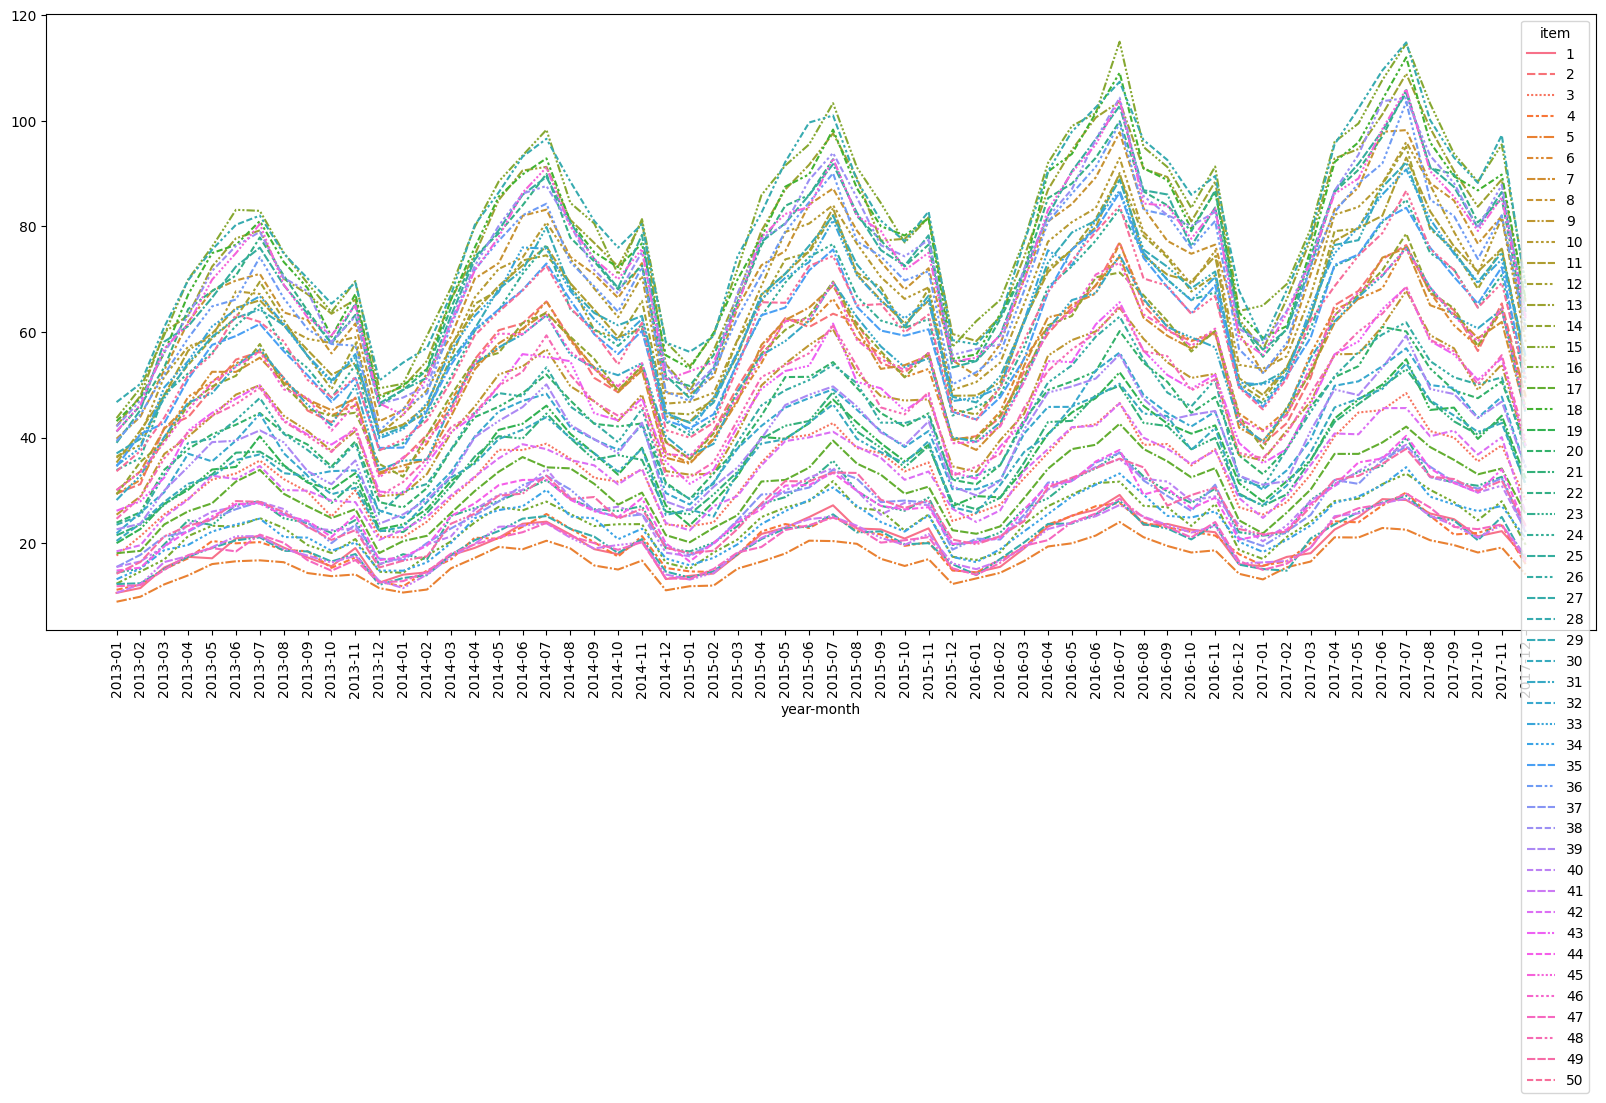

In [27]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.tick_params(axis="x", labelrotation=90)
sns.lineplot(data=data_wide)

## stat: groupby(["month", "item"])

In [28]:
data_wide = data.groupby(["month", "item"], as_index=False).mean().pivot("month", "item", "sales")
data_wide.head()

/tmp/ipykernel_55467/3869354891.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_wide = data.groupby(["month", "item"], as_index=False).mean().pivot("month", "item", "sales")
/tmp/ipykernel_55467/3869354891.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_wide = data.groupby(["month", "item"], as_index=False).mean().pivot("month", "item", "sales")


item,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
month,,,,,,,,,,,,,,,,,,,,,
1,13.709677,36.070968,22.600000,13.554839,11.567742,35.941935,35.361290,47.406452,31.354839,46.167742,...,13.316129,22.432258,30.819355,18.090323,49.748387,36.625806,13.361290,31.845161,18.083871,40.367742
2,14.631206,39.936170,24.886525,15.014184,12.581560,40.191489,39.219858,52.531915,35.234043,49.531915,...,14.801418,25.340426,34.645390,19.695035,54.971631,40.127660,14.829787,35.524823,19.212766,44.872340
3,17.600000,48.135484,29.716129,17.800000,15.141935,49.000000,47.729032,63.496774,41.987097,59.864516,...,18.038710,30.283871,40.941935,24.438710,65.238710,47.103226,17.961290,43.058065,23.741935,53.638710
4,20.786667,56.020000,34.693333,21.606667,17.613333,56.146667,56.233333,73.753333,49.433333,70.346667,...,21.233333,34.833333,48.993333,27.660000,76.080000,55.606667,20.426667,49.053333,27.786667,62.613333
5,22.245161,60.916129,39.232258,22.774194,18.877419,60.277419,60.535484,77.548387,52.858065,74.845161,...,22.987097,38.148387,51.903226,30.787097,81.896774,60.709677,22.638710,52.870968,30.064516,66.593548


<AxesSubplot: xlabel='month'>

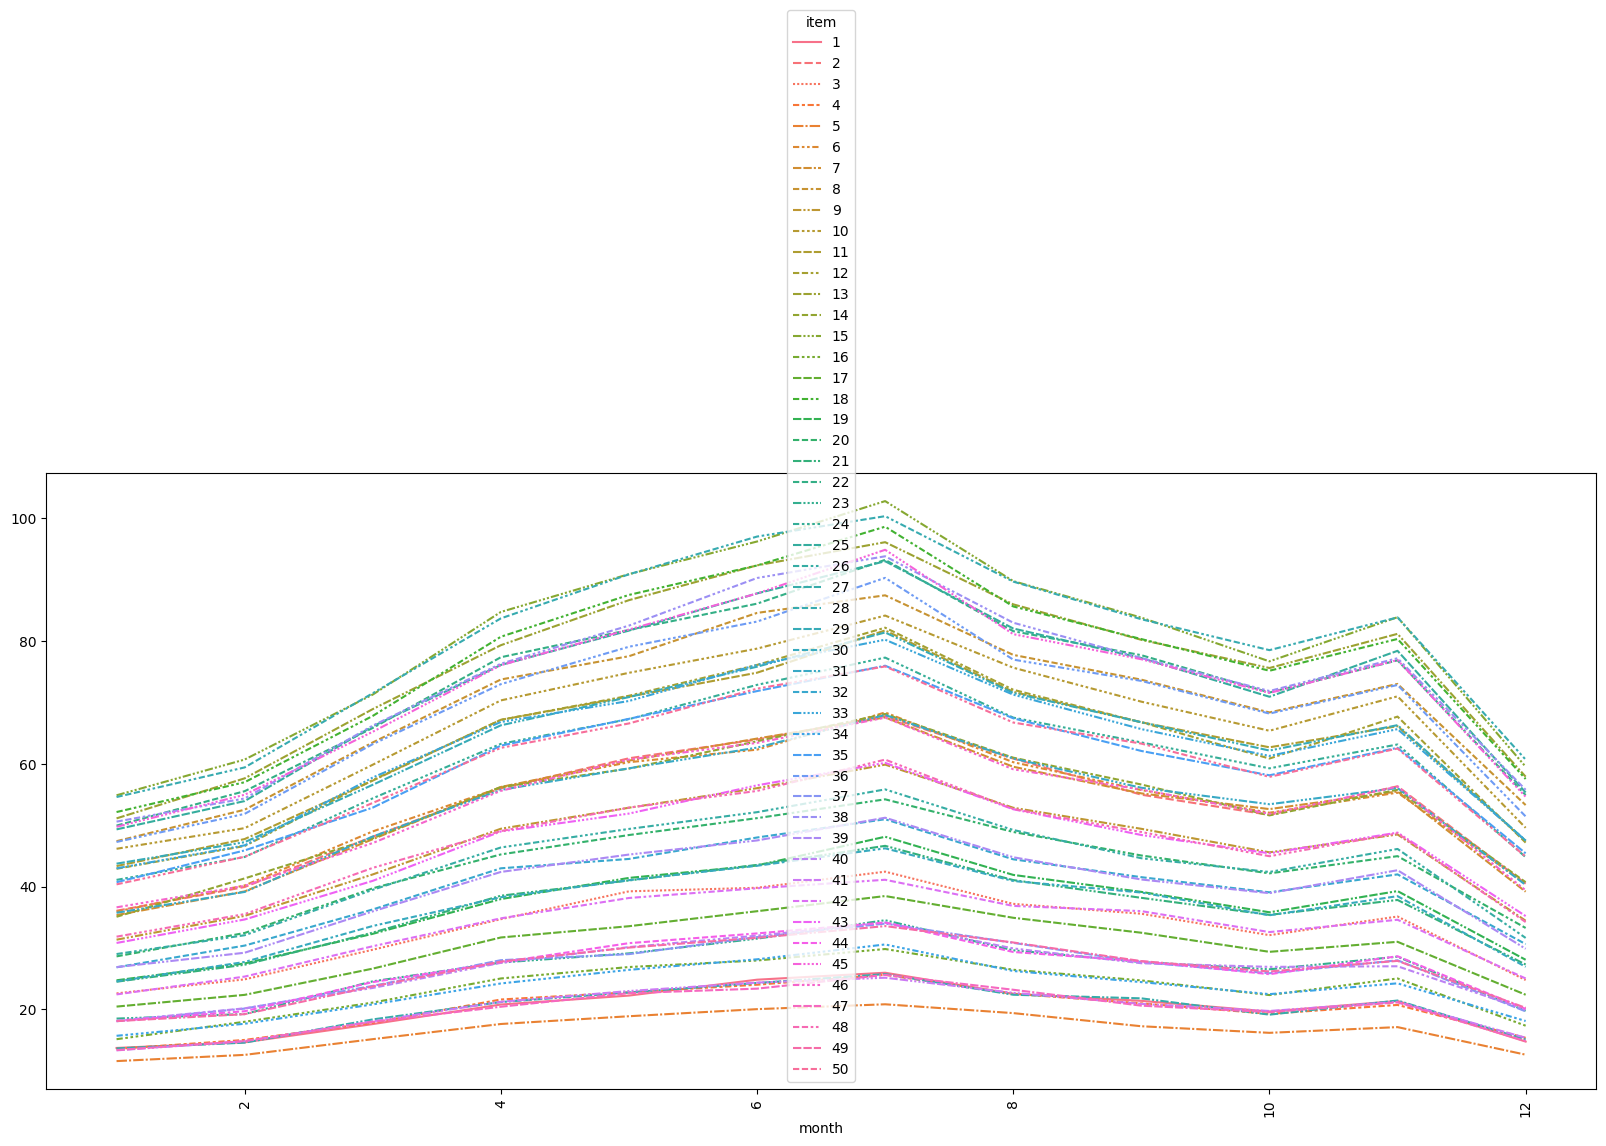

In [29]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.tick_params(axis="x", labelrotation=90)
sns.lineplot(data=data_wide)

## stat: groupby(["dow", "item"])

In [30]:
data_wide = data.groupby(["dow", "item"], as_index=False).mean().pivot("dow", "item", "sales")
data_wide.head()

/tmp/ipykernel_55467/3103465028.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_wide = data.groupby(["dow", "item"], as_index=False).mean().pivot("dow", "item", "sales")
/tmp/ipykernel_55467/3103465028.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_wide = data.groupby(["dow", "item"], as_index=False).mean().pivot("dow", "item", "sales")


item,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
dow,,,,,,,,,,,,,,,,,,,,,
0,15.584615,42.069231,26.784615,15.492308,13.061538,41.896154,41.457692,54.630769,37.146154,52.565385,...,15.669231,26.646154,37.269231,21.100000,57.873077,41.780769,15.738462,36.796154,21.188462,46.946154
1,18.168582,48.839080,30.199234,18.425287,15.233716,49.199234,48.406130,64.655172,42.747126,60.957854,...,18.337165,30.398467,42.072797,24.670498,67.226054,48.283525,18.314176,43.260536,24.249042,54.685824
2,18.793103,49.704981,30.731801,18.440613,15.517241,49.609195,48.547893,64.367816,43.176245,61.333333,...,18.524904,31.122605,43.130268,24.467433,67.436782,48.846743,18.590038,42.643678,23.973180,55.605364
3,19.452107,52.536398,32.555556,20.356322,17.011494,51.647510,52.693487,68.398467,46.402299,65.796935,...,19.544061,32.789272,45.639847,26.754789,71.218391,52.601533,19.862069,45.942529,26.842912,58.762452
4,21.015326,55.931034,35.218391,20.739464,17.302682,56.019157,55.302682,73.601533,48.670498,70.264368,...,21.344828,34.781609,48.662835,28.042146,76.754789,56.118774,20.839080,49.421456,27.567050,62.348659


<AxesSubplot: xlabel='dow'>

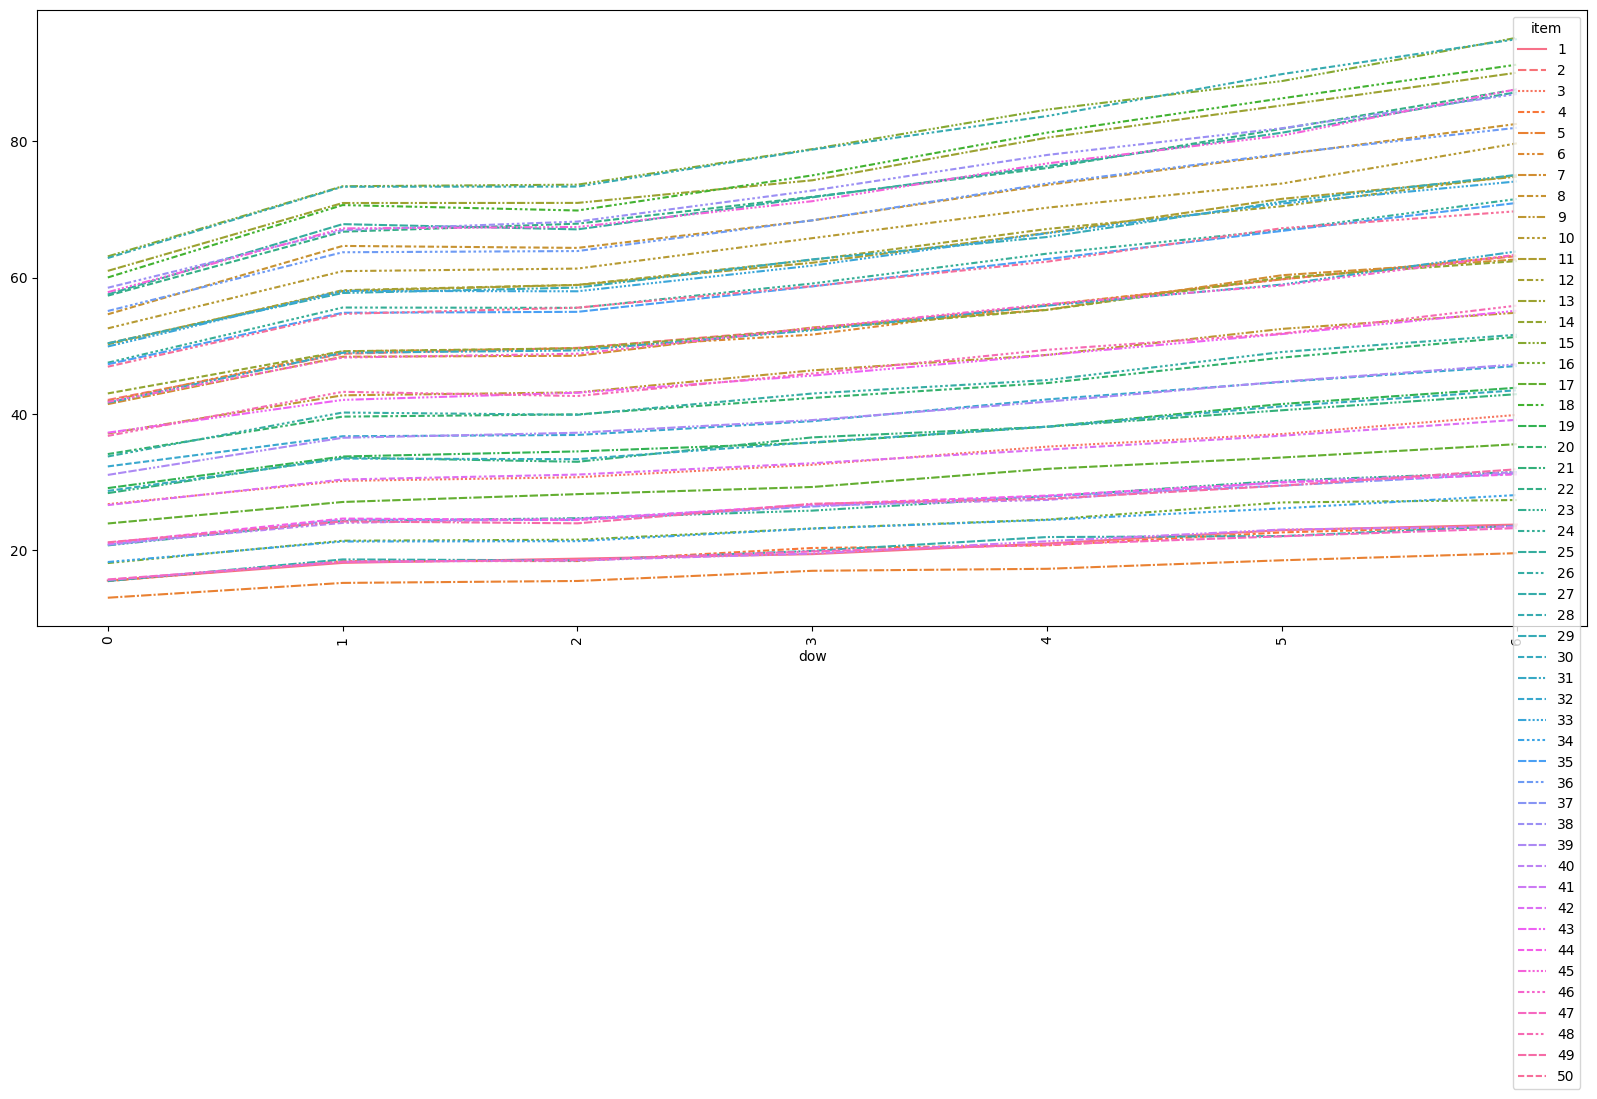

In [31]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.tick_params(axis="x", labelrotation=90)
sns.lineplot(data=data_wide)